In [34]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import pandas as pd

In [39]:
def display_image(path_series, **kwargs):
    path = path_series.iloc[0]  # Extract the string path from the Series
    img = mpimg.imread(path)
    plt.imshow(img)
    plt.axis('off')  # Remove axes

def plot_from_every_class(main_dir, file):
    # Prepare the data for Seaborn plotting
    data = []
    for subdir in os.listdir(main_dir):
        if os.path.isdir(os.path.join(main_dir, subdir)):
            class_label = subdir.split('_')[0]  # Assumes class_timestamp format
            image_path = os.path.join(main_dir, subdir, file)
            if os.path.exists(image_path):
                data.append({'Class': class_label, 'ImagePath': image_path})
            else:
                print(f"Image not found: {image_path}")

    # Convert data to DataFrame
    df = pd.DataFrame(data)

    # Create a FacetGrid
    g = sns.FacetGrid(df, col='Class', col_wrap=2, sharex=False, sharey=False)

    # Map the display_image function to each subplot
    g.map(display_image, 'ImagePath')

    # Adjust the layout
    g.fig.subplots_adjust(wspace=0.02, hspace=0.2)  # Adjust spacing between subplots
    g.set_titles('{col_name}')  # Set titles as class labels

    plt.show()

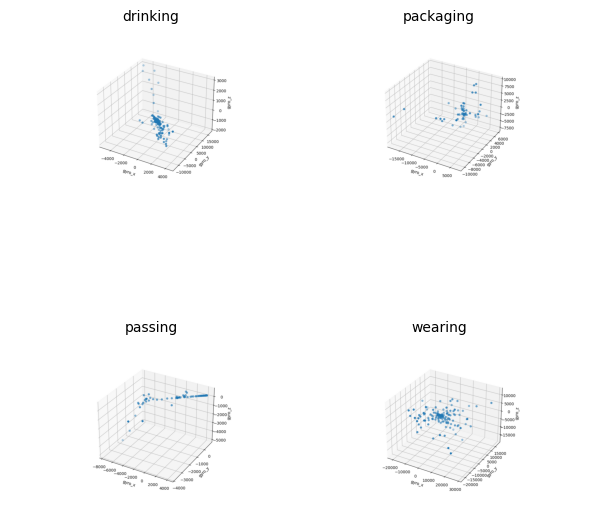

In [40]:
# Path to the main directory
main_dir = 'C:/Users/Lukas Volk/Documents/out'  # Update this to your main directory path

plot_from_every_class(main_dir, 'gyro_scatter3d.png')

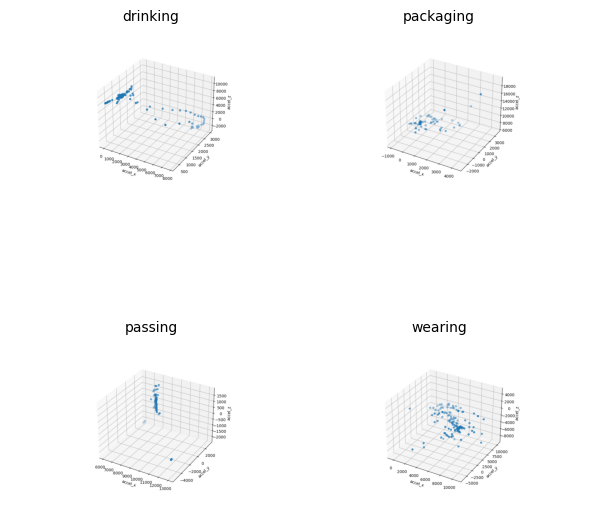

In [41]:
plot_from_every_class(main_dir, 'accel_scatter3d.png')